# Data Science Project: Retail Customer Segmentation and Sales Prediction

The retail industry is a rich source of data and analytics, providing numerous opportunities to apply data science and machine learning techniques. 
In this project, I will analyze a comprehensive dataset containing customer transaction history, product details, and demographic information across a defined time period. Using a dataset from Kaggle, I will explore, model, and visualize the data to solve real-world business problems. 


First, I imported the necessary sets before moving on to the project. 
I also import warnings to control warnings throughout the project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

You can access this `data.csv` from here. 
https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [5]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In this project, I will explore and analyze this dataset by following these sections. 
1. Data Exploration and Preprocessing
2. Customer Segmentation
3. Sales Prediction
4. Data Visualization
5. Performance Evaluation

In the first section, which is called **Data Exploration and Preprocessing**, I will first load and explore the dataset to understand its structure and contents, then handle missing data, convert data types, and perform basic data preprocessing tasks.
After that, I will conduct exploratory data analysis, EDA, to uncover trends and insights. 

First, let's explore the dataset to get a brief idea of the structure and contents.

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.InvoiceDate.unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      dtype=object)

As you can see, the `InvoiceDate` is not marked as a proper format. Therefore, I will change this format to `datetime`.

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Once I understand the structure and contents of this data, I will move on to handle those missing values from now on. 
First, I want to see how many missing values there are in each column and think about what I can implement to handle each problem.

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Since there is so much data, about 540,000, I can just delete missing values from `Description` and `CustomerID`.
Needless to say, we can't tell the insights of this data without `CustomerID`, which identifies every customer by an integer. 

In [13]:
df.dropna(subset= ['Description', 'CustomerID'], inplace = True)

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

As you can see, I have finished handling missing values since there are no missing values anymore in the data. 

However, there is still inappropriate data in the dataset, let's explore those and handle them correctly.

First, I want to make sure `InvoiceNo`.
In many Enterprise Resource Planning, a `credit note`or `refund invoice` is issued for returns or order cancellations. 
Therefore, the invoice number that starts with **C** is the canceling or crediting part.

In my project, since I'm trying to model purchases and revenue, also understand customer buying behavior, removing **C** invoices sounds the best option. 

In [15]:
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
df = df[~df['InvoiceNo'].astype(str).str.startswith("C")]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In addition, I would love to remove data that has negative or zero `Quantity` and `UnitPrice`.

In [17]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

Since I have done handling of missing data and converted data types, I will do feature engineering, which will help a lot with my prediction.

First, I'm going to make a new column called `TotalPrice` which requires since we need to predict it by using machine learning models. 

In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

Moreover, I would like to extract useful time-based insigths from this data, I will make columns called `InvoiceMonth`, `DayOfWeek`, and `Hour`.

In [19]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8


In [21]:
df.shape

(397884, 12)

Before finishing this section, I will implement basic EDA and extract meaningful insights from the data. 

In [22]:
print('Unique customers:', df['CustomerID'].nunique())
print('Unique produects:', df['StockCode'].nunique())

Unique customers: 4338
Unique produects: 3665


In [23]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


As this shows, the most famous product is 'Paper Craft, Little Birdie'. 
These descriptions are so important to tell the insights of data since most of the descriptions seem neat and tiny in the data.

In [24]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending = False).head(10)
print(top_customers)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


Knowing about each customer's behavior is really important in this project, that's why I search for who contributes to this by exploring `TotalPrice` column. 
As we can see, the `CustomerID` 14646.0 is the top customer in terms of `TotalPrice`. 

In [25]:
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum()
print(monthly_revenue)

InvoiceMonth
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: TotalPrice, dtype: float64


Moreover, I'm curious about monthly revenue, which might not help with this project directly.
This data shows people tend to spend money by the end of year, while December is the least revenue month. 

In [26]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Hour
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,12.728202
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,6.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,11.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,13.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,14.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,20.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,2.273519


After completing the first section, I would like to move on to the next section, which is **Customer Segmentation**.

The goal for this section is to segment customers based on their purchasing behavior using unsupervised learning. 
This helps identify loyal, high-value, or at-risk customers for better marketing strategies. 

I would also set my goal to think about potential business strategies for each segment based on their behavior. 

Before starting this section, I need to make some new features to succeed in segmenting smoothly.
I want to make three features, `Recency`, `Frequency`, and `Monetary`. 

First, I will create `Monetary`, `Frequency`, and `LastInvoiceDate` for making `Recency` column. 

In [27]:
aggregated_df = df.groupby('CustomerID', as_index = False).agg(
    Monetary = ('TotalPrice', 'sum'),
    Frequency = ('InvoiceNo', 'nunique'), 
    LastInvoiceDate = ('InvoiceDate', 'max'))
aggregated_df.head()

,CustomerID,Monetary,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1797.24,4,2011-09-25 13:13:00
3,12349.0,1757.55,1,2011-11-21 09:51:00
4,12350.0,334.40,1,2011-02-02 16:01:00


`Recency`: Days since last purchase
`Frequency`: Number of purchases
`Monetary`: Total spend

In [28]:
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'], errors='coerce')
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [29]:
aggregated_df.head()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1797.24,4,2011-09-25 13:13:00,74
3,12349.0,1757.55,1,2011-11-21 09:51:00,18
4,12350.0,334.40,1,2011-02-02 16:01:00,309


This is the `aggregated_df`, which is for unsupervised modeling. 
As you can see, I removed a lot of columns from the original dataset since I only want to segment the customer behavior in this section.

Before building unsupervised models, I would love to visualize these three new features and see each trends. 

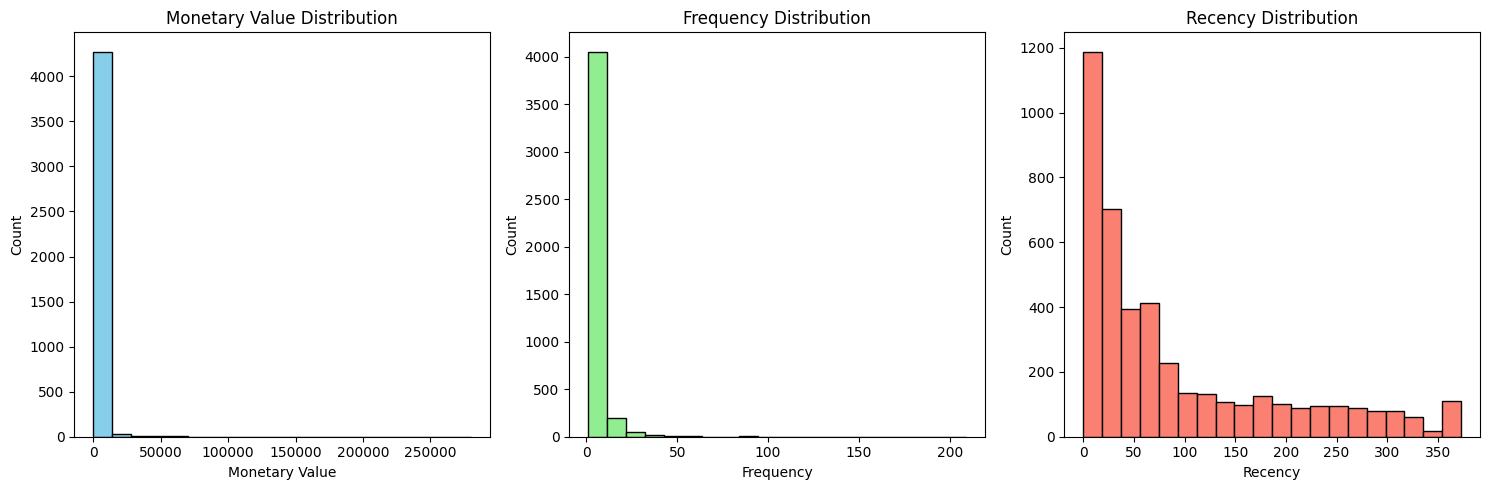

In [31]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['Monetary'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins = 20, color = 'lightgreen', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins = 20, color = 'salmon', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

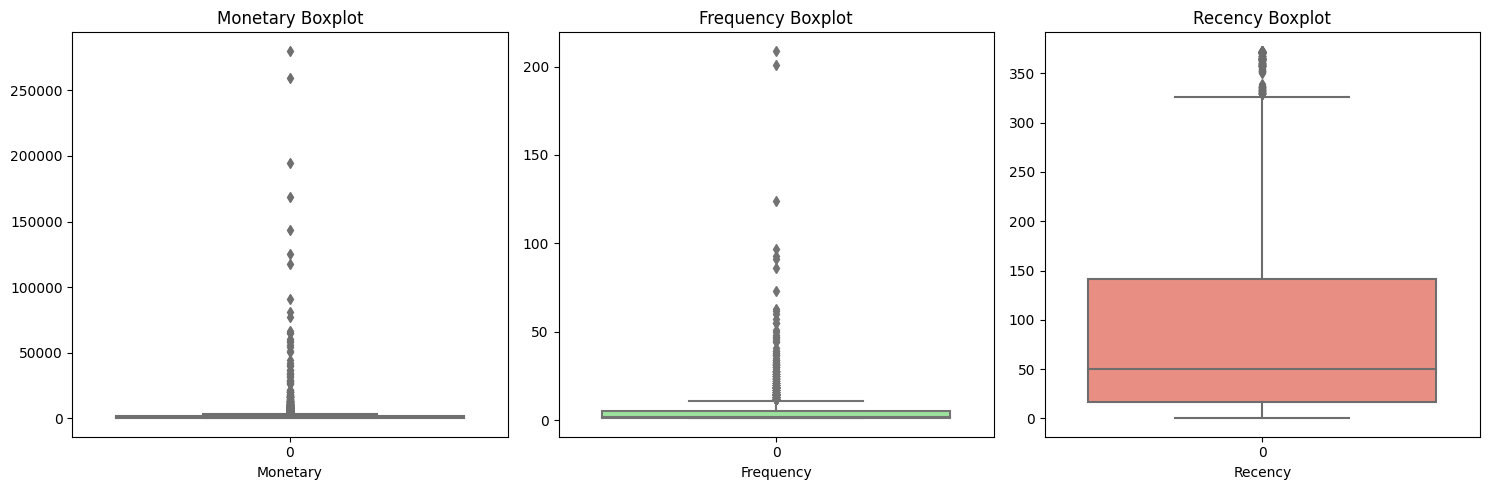

In [32]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = aggregated_df['Monetary'], color = 'skyblue')
plt.title('Monetary Boxplot')
plt.xlabel('Monetary')

plt.subplot(1,3,2)
sns.boxplot(data = aggregated_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = aggregated_df['Recency'], color = 'salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

For this project, I would like to remove outliers from each dataset to enhance the accuracy of my analysis.

In [32]:
# get rid of outlier

M_Q1 = aggregated_df['Monetary'].quantile(0.25)
M_Q3 = aggregated_df['Monetary'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['Monetary'] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df['Monetary'] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,427.000000,427.000000,427.000000,427,427.000000
mean,14959.911007,12748.716651,16.749415,2011-11-14 20:26:22.201405184,24.222482
min,12346.000000,3703.290000,1.000000,2010-12-02 15:27:00,0.000000
25%,13180.500000,4463.535000,7.000000,2011-11-16 10:33:00,3.000000
50%,14866.000000,5900.280000,12.000000,2011-11-29 11:46:00,10.000000
75%,16600.500000,9780.115000,19.000000,2011-12-06 12:07:30,23.000000
max,18251.000000,280206.020000,209.000000,2011-12-09 12:49:00,371.000000
std,1821.506145,26252.841780,19.234907,NaN,45.694224


In [33]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,285.000000,285.000000,285.000000,285,285.000000
mean,15338.080702,14540.277053,22.954386,2011-11-25 10:47:56.421052672,13.631579
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.000000,4206.390000,13.000000,2011-11-23 15:39:00,2.000000
50%,15291.000000,6328.050000,17.000000,2011-12-02 15:22:00,6.000000
75%,16764.000000,11138.710000,24.000000,2011-12-07 11:35:00,15.000000
max,18283.000000,280206.020000,209.000000,2011-12-09 12:49:00,371.000000
std,1737.836650,30071.664202,21.202777,NaN,30.695822


In [34]:
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)
R_IQR = R_Q3 - R_Q1

recency_outliers_df = aggregated_df[(aggregated_df['Recency'] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_df['Recency'] < (R_Q1 - 1.5 * R_IQR))].copy()

recency_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,155.000000,155.000000,155.000000,155,155.000000
mean,15468.238710,365.319161,1.329032,2010-12-16 13:15:13.935483904,357.477419
min,12386.000000,15.000000,1.000000,2010-12-01 09:53:00,329.000000
25%,13935.000000,154.535000,1.000000,2010-12-03 12:42:00,351.500000
50%,15464.000000,244.080000,1.000000,2010-12-10 13:48:00,363.000000
75%,16854.000000,360.740000,1.000000,2010-12-22 23:21:00,370.500000
max,18269.000000,5391.210000,34.000000,2011-01-14 12:23:00,373.000000
std,1794.889151,542.977696,2.672879,NaN,14.773324


In [35]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(recency_outliers_df.index))]
non_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,3710.000000,3710.000000,3710.000000,3710,3710.000000
mean,15326.251752,887.351400,2.836119,2011-09-10 20:47:24.598382848,89.148248
min,12348.000000,3.750000,1.000000,2011-01-17 10:52:00,0.000000
25%,13859.250000,296.475000,1.000000,2011-07-24 10:38:30,21.000000
50%,15328.000000,602.940000,2.000000,2011-10-14 16:27:00,55.000000
75%,16799.000000,1244.770000,4.000000,2011-11-18 10:37:30,138.000000
max,18287.000000,3692.280000,11.000000,2011-12-09 12:50:00,326.000000
std,1702.536299,813.511284,2.193053,NaN,88.908883


I'm going to use the new data, which is called `non_outliers_df`, for further unsupervised modeling. 

Before building those models, I would love to visualize the `non_outliers_df` and check if this is helpful. 

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

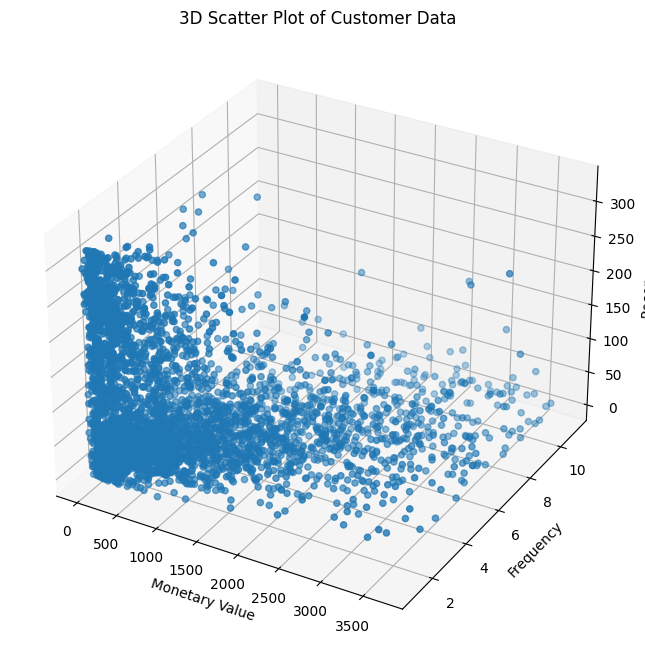

In [36]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')


Before applying K-Means clustering, it's important to scale the features so that each one contributes equally to the distance calculations. 
In this case, we're using the `Recency`, `Frequency`, and `Monetary` features for customer segmentation. These features are on very different scales:

- `Recency` may range from a few days to several hundred.
- `Frequency` typically ranges from 1 to 50.
- `Monetary` might range from a few dollars to thousands.

Since K-Means relies on Euclidean distance, features with larger numeric ranges, like `Monetary` could disproportionately influence the clustering results. 
To address this, we will apply **StandardScaler** from `sklearn.preprocessing` to normalize the data. This will transform the features so they each have a mean of 0 and a standard deviation of 1. 
This ensures that all features contribute equally to the clustering process. 

In [37]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()

scaled_data = sclaer.fit_transform(non_outliers_df[['Monetary', 'Frequency', 'Recency']])

scaled_data

array([[ 1.11862155,  0.53078448, -0.17040243],
       [ 1.06982647, -0.83735616, -0.80034566],
       [-0.67980119, -0.83735616,  2.47310931],
       ...,
       [-0.99155369, -0.83735616,  1.0219901 ],
       [-0.87201865, -0.38130928, -0.9240845 ],
       [ 1.16784692,  0.0747376 , -0.53036999]])

Since the `scaled_data` is an array, I will save it as a pandas dataframe to enhance efficiency. 

In [38]:
scaled_data_df = pd.DataFrame(scaled_data, index =non_outliers_df.index, columns = ('Monetary', 'Frequency', 'Recency'))

scaled_data_df

,Monetary,Frequency,Recency
2,1.118622,0.530784,-0.170402
3,1.069826,-0.837356,-0.800346
4,-0.679801,-0.837356,2.473109
5,1.990024,2.354972,-0.609113
6,-0.981497,-0.837356,1.280717
...,...,...,...
4332,-0.877121,-0.837356,-0.181651
4333,-0.868884,-0.837356,2.113142
4334,-0.991554,-0.837356,1.021990
4335,-0.872019,-0.381309,-0.924085


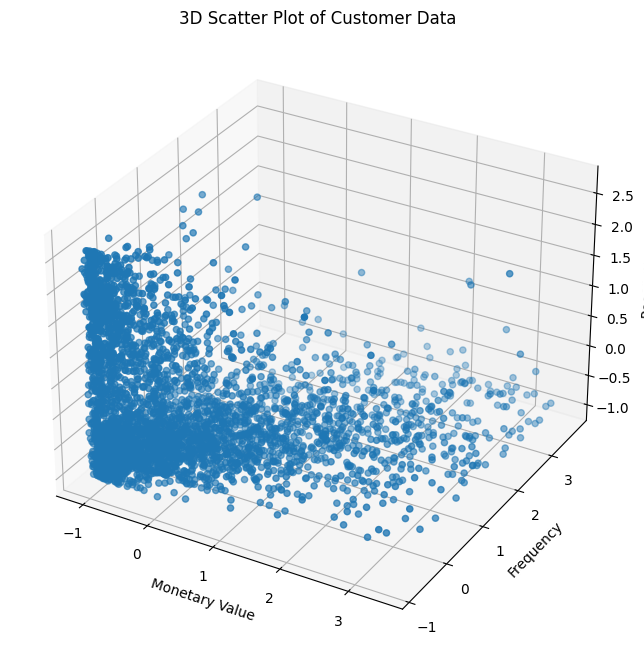

In [39]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(scaled_data_df['Monetary'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

After scaling the RFM features, the next step is to determine the optimal number of clusters for K-Means clustering. 
Since K-Means requires you to specify the number of clusters ahead of time, we use two popular techiniques to evaluate different values of k.

1. Inertia
- Inertia measures the sum of squared distances between data points and their assigned cluster center.
- As k increases, inertia decreases, but after a certain point, the improvement levels off.
- The `elbow point` on the inertia plot indicates a good trade-off between performance and simplicity.

2. Silhouette Score
- Silhouette score measures how well each point fits into its cluster compared to others.
- It ranges from -1 to 1, where a **higher score** means better-defined clusters.
- This helps validate the quality of clustering, especially when comparing different k values. 

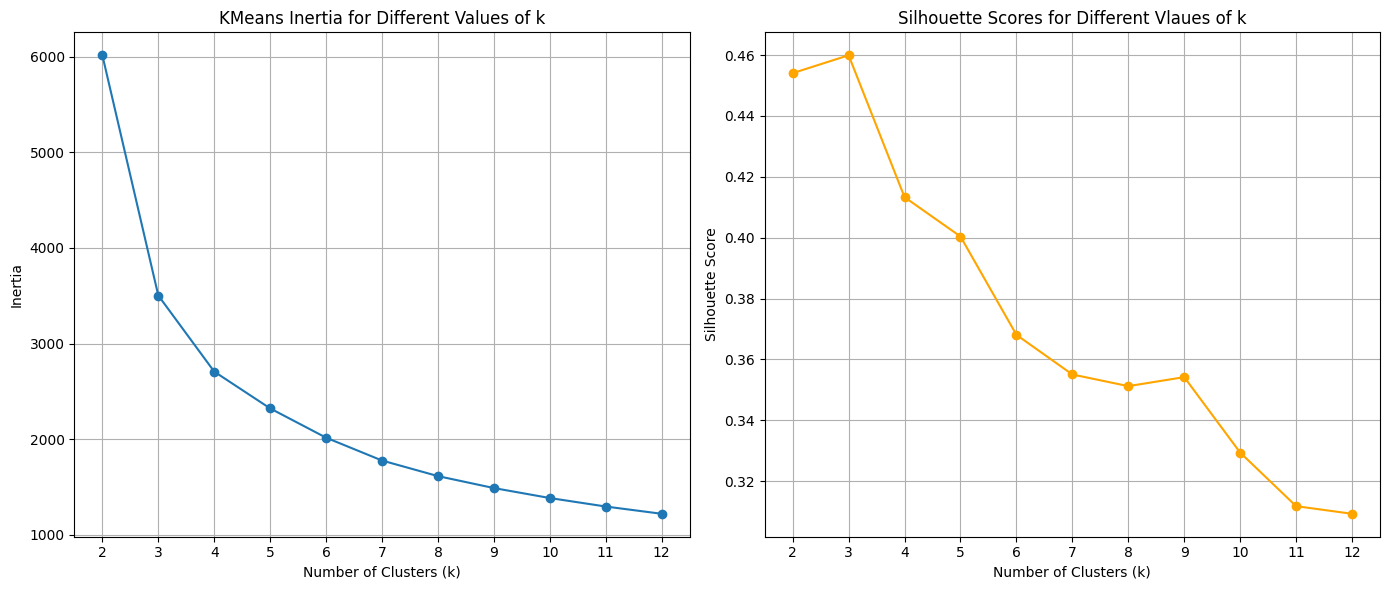

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_k  =12

inertia = []
silhouette_scores = []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'orange')
plt.title('Silhouette Scores for Different Vlaues of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

These plots show that clusters 3 or 4 would help segment customer behavior and identify potential actionable insights from unsupervised learning. 

In [42]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 3, 0, ..., 0, 1, 3], dtype=int32)

First, let's explore by using 4 clusters and see what will happen. 

In [43]:
non_outliers_df['Cluster'] = cluster_labels

non_outliers_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1757.55,1,2011-11-21 09:51:00,18,3
4,12350.0,334.40,1,2011-02-02 16:01:00,309,0
5,12352.0,2506.04,8,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,0
...,...,...,...,...,...,...
4332,18278.0,173.90,1,2011-09-27 11:58:00,73,1
4333,18280.0,180.60,1,2011-03-07 09:52:00,277,0
4334,18281.0,80.82,1,2011-06-12 10:53:00,180,0
4335,18282.0,178.05,2,2011-12-02 11:43:00,7,1


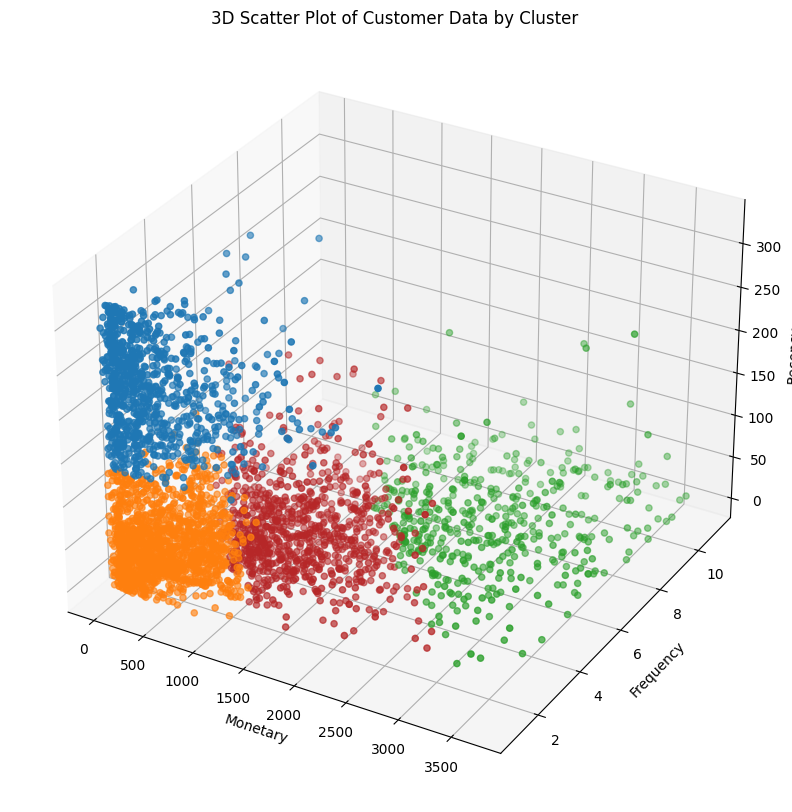

In [44]:
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#b62728'}

colors =  non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c = colors, marker = 'o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

As we can see, I made 4 clusters based on `Monetary`, `Frequency`, and `Recency`.
To gain insights from this meaningful segmenting, I would like to visualize each cluster's features and identify 

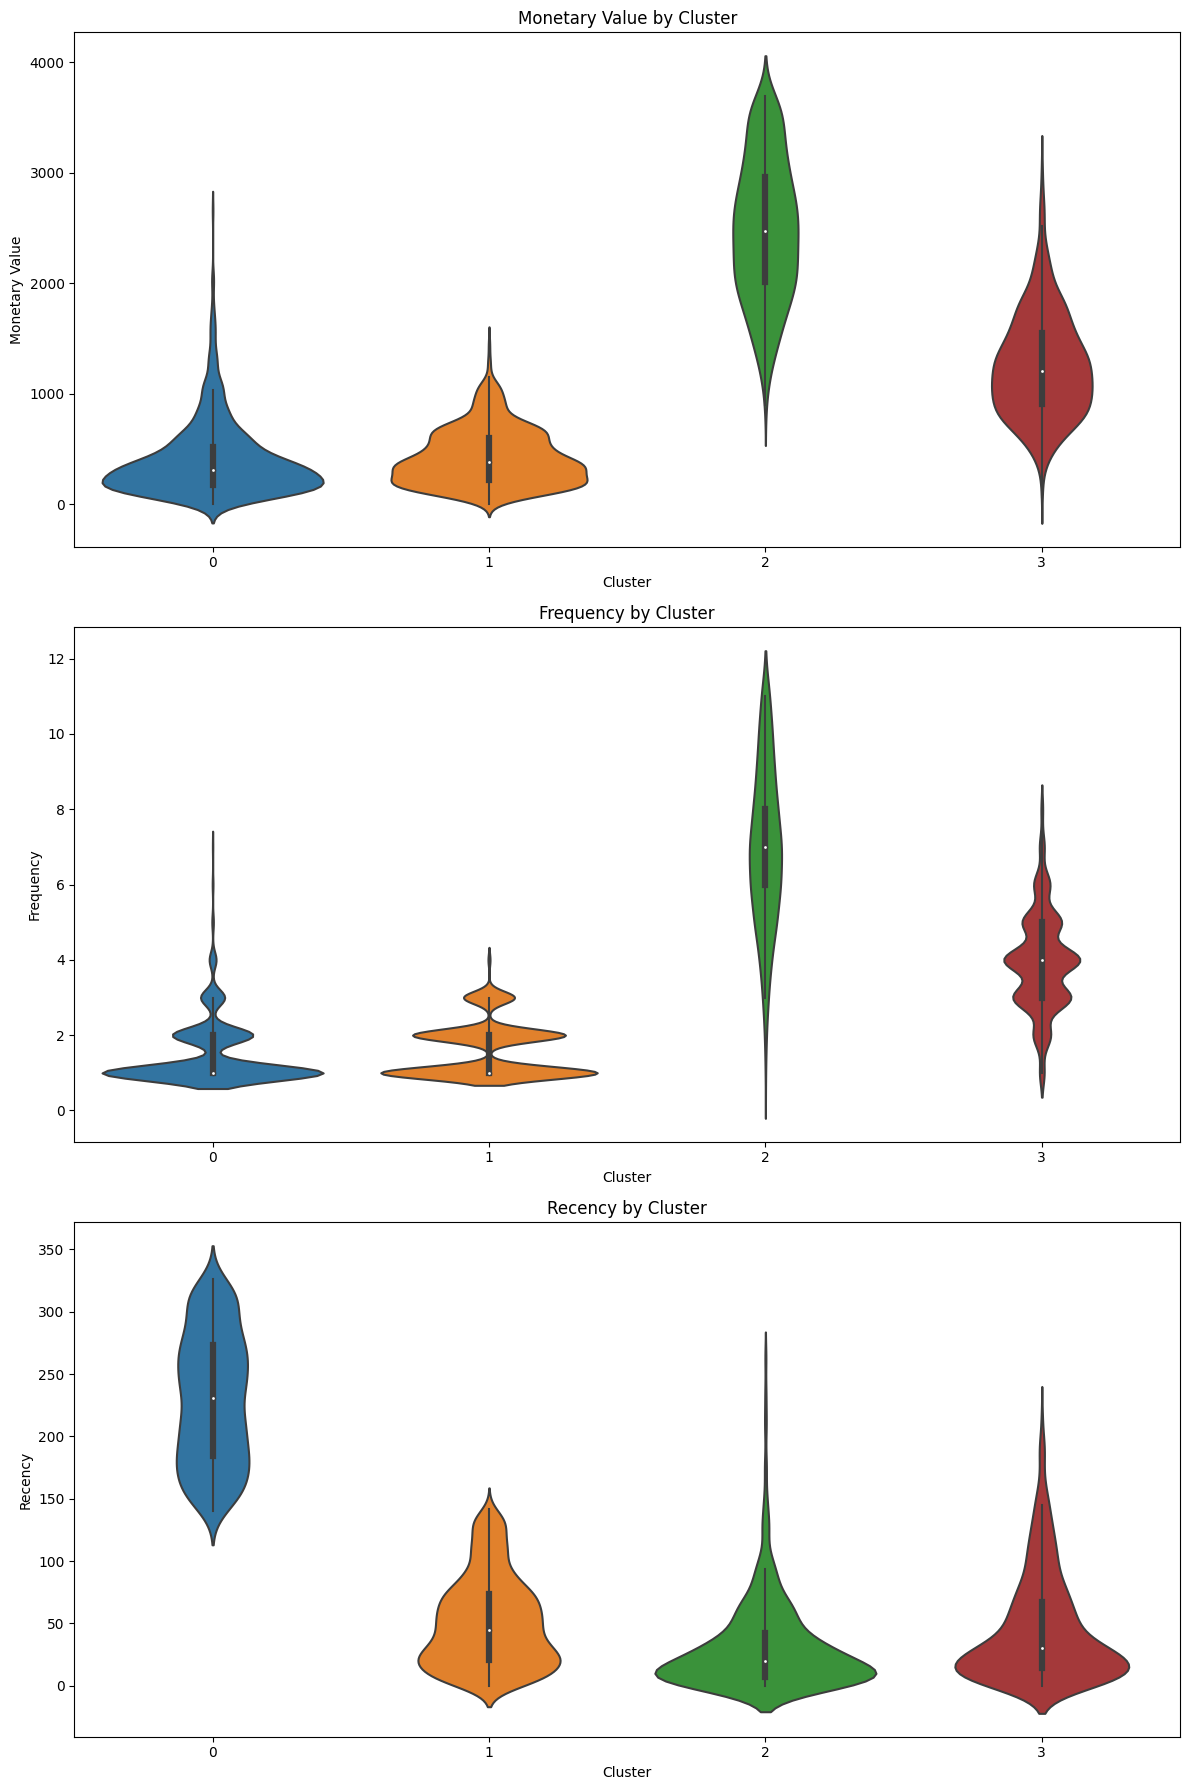

In [45]:
plt.figure(figsize = (12, 18))

plt.subplot(3,1,1)
sns.violinplot(x = 'Cluster', y = 'Monetary', data = non_outliers_df, palette = cluster_colors)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x = 'Cluster', y = 'Frequency', data = non_outliers_df, palette = cluster_colors)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x = 'Cluster', y = 'Recency', data = non_outliers_df, palette = cluster_colors)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): Re-Engage
   - Rationale: This group includes low-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
   - Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

2. Cluster 1 (Orange): Nurture
   - Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
   - Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
  
3. Cluster 2 (Green): Reward
   - Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is the key to maintaining their encouragement.
   - Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.
  
4. Cluster 3 (Red): Retain
   - Rationale: This group represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
   - Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
  
**Summary of Cluster Names**
- Cluster 0 (Blue): Re-Engage
- Cluster 1 (Orange): Nurture
- Cluster 2 (Green): Reward
- Cluster 3 (Red): Retain

In [46]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_cluster_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,5226.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4252,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4272,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4291,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4293,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


Since I was exploring potential business strategies for non-outlier data, now let's move on to the outlier data, which looks hard to segment, but it's valuable to see the insights.

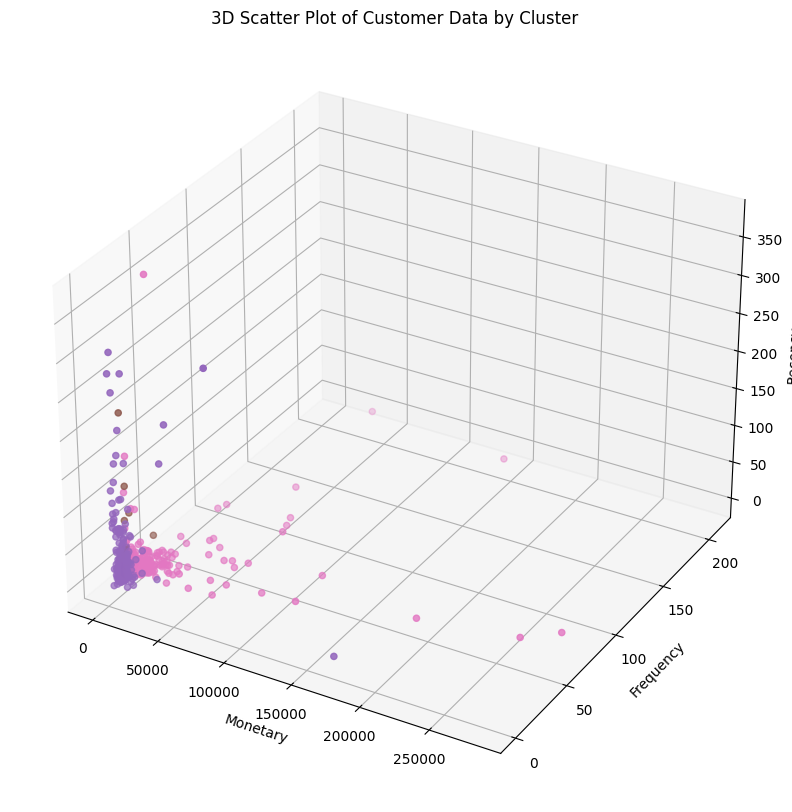

In [48]:
cluster_colors = {-1: '#9467bd', -2: '#8c564b', -3: '#e377c2'}

colors =  outlier_cluster_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
scatter = ax.scatter(outlier_cluster_df['Monetary'], outlier_cluster_df['Frequency'], outlier_cluster_df['Recency'], c = colors, marker = 'o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

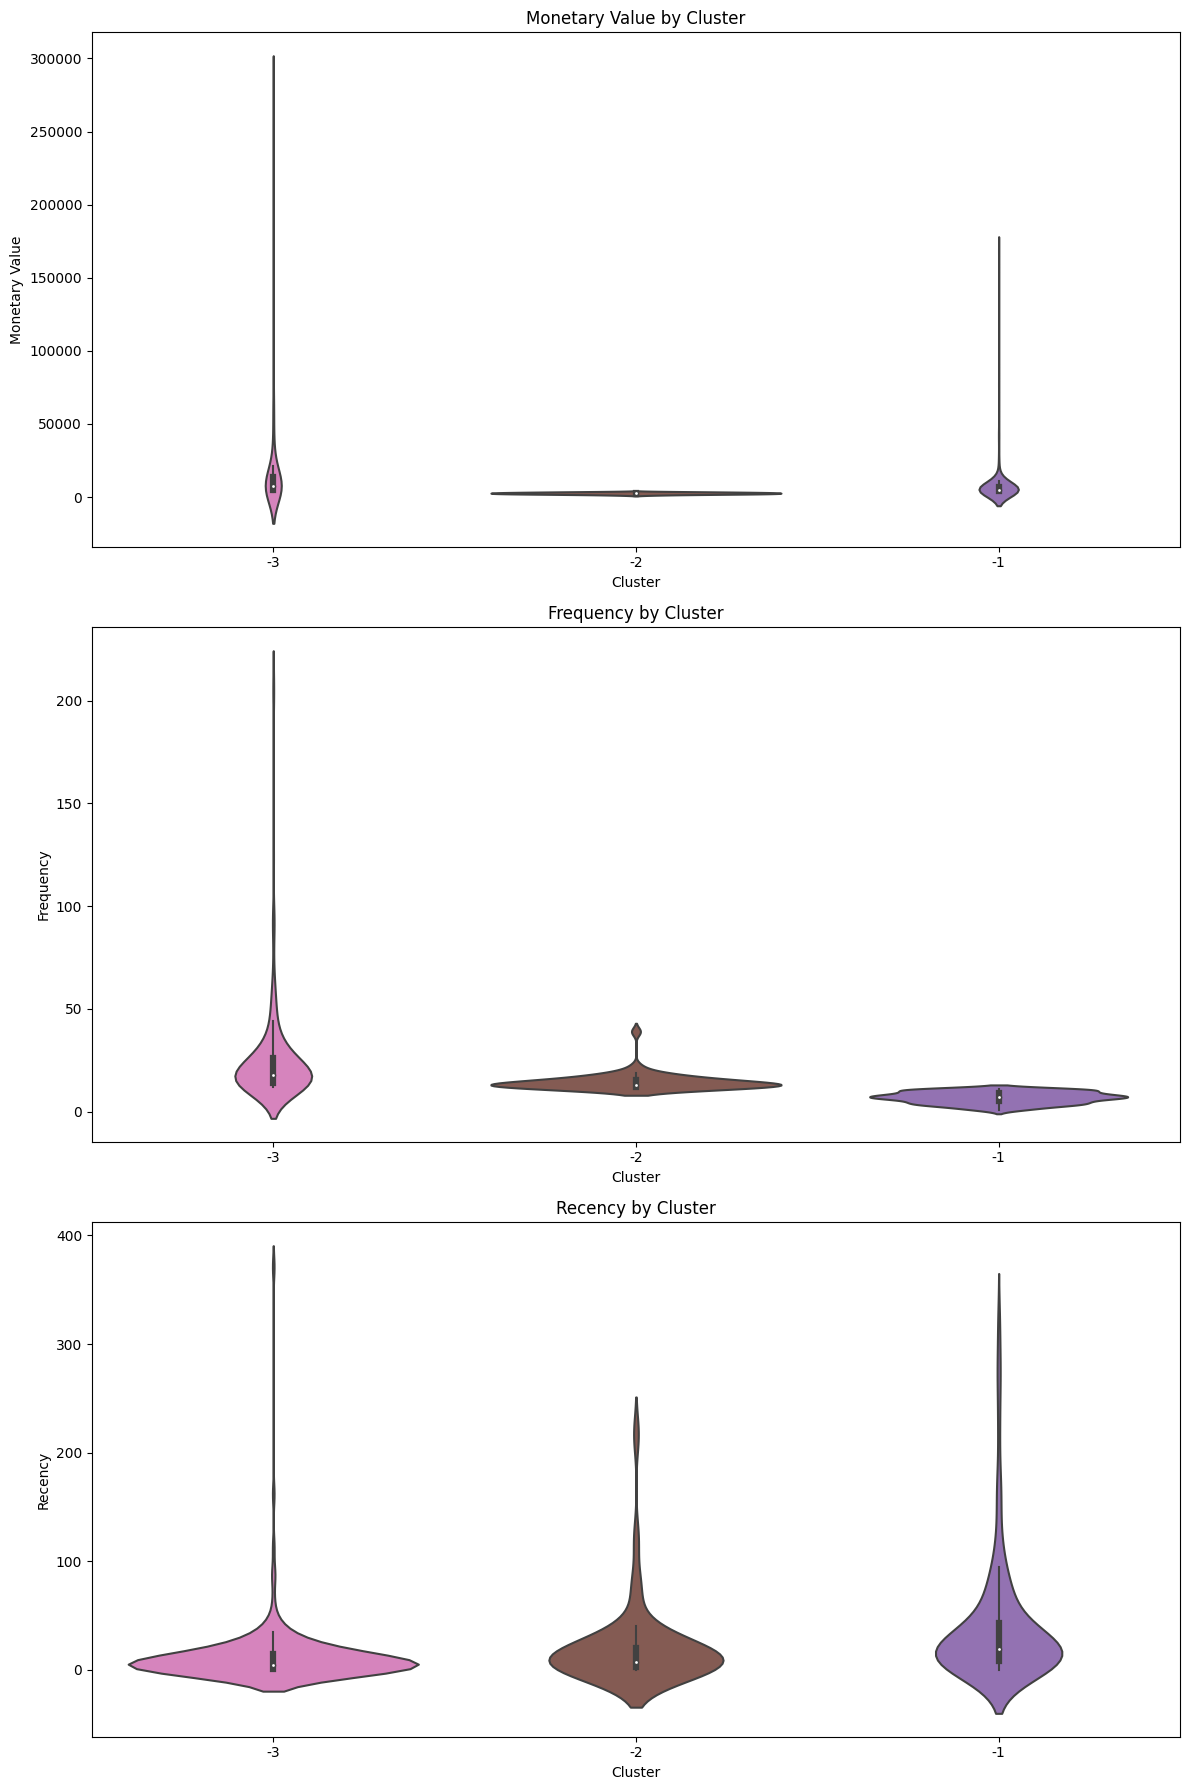

In [49]:
cluster_colors = {-1: '#9467bd', -2: '#8c564b', -3: '#e377c2'}

plt.figure(figsize = (12,18))

plt.subplot(3,1,1)
sns.violinplot(x = 'Cluster', y = 'Monetary', data = outlier_cluster_df, palette = cluster_colors)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x = 'Cluster', y = 'Frequency', data = outlier_cluster_df, palette = cluster_colors)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x = 'Cluster', y = 'Recency', data = outlier_cluster_df, palette = cluster_colors)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
   - Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
   - Potential Strategies: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.
  
2. Cluster -2 (Frequency Outliers) UPSELL:
   - Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
   - Potential Strategies: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.
  
3. Cluster -1 (Monetary Outliers) PAMPER:
   - Characteristics: High  spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
   - Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity. 

In [50]:
cluster_labels = {
    0: 'RE-ENGAGE',
    1: 'NURTURE',
    2: 'REWARD',
    3: 'RETAIN',
    -1: 'PAMPER', 
    -2: 'UPSELL',
    -3: 'DELIGHT'
}

In [51]:
full_clustering_df = pd.concat([non_outliers_df, outlier_cluster_df])

full_clustering_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1757.55,1,2011-11-21 09:51:00,18,3
4,12350.0,334.40,1,2011-02-02 16:01:00,309,0
5,12352.0,2506.04,8,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,0
...,...,...,...,...,...,...
4252,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4272,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4291,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4293,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


In [52]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

full_clustering_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN
3,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN
4,12350.0,334.40,1,2011-02-02 16:01:00,309,0,RE-ENGAGE
5,12352.0,2506.04,8,2011-11-03 14:37:00,35,2,REWARD
6,12353.0,89.00,1,2011-05-19 17:47:00,203,0,RE-ENGAGE
...,...,...,...,...,...,...,...
4252,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4272,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4291,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4293,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


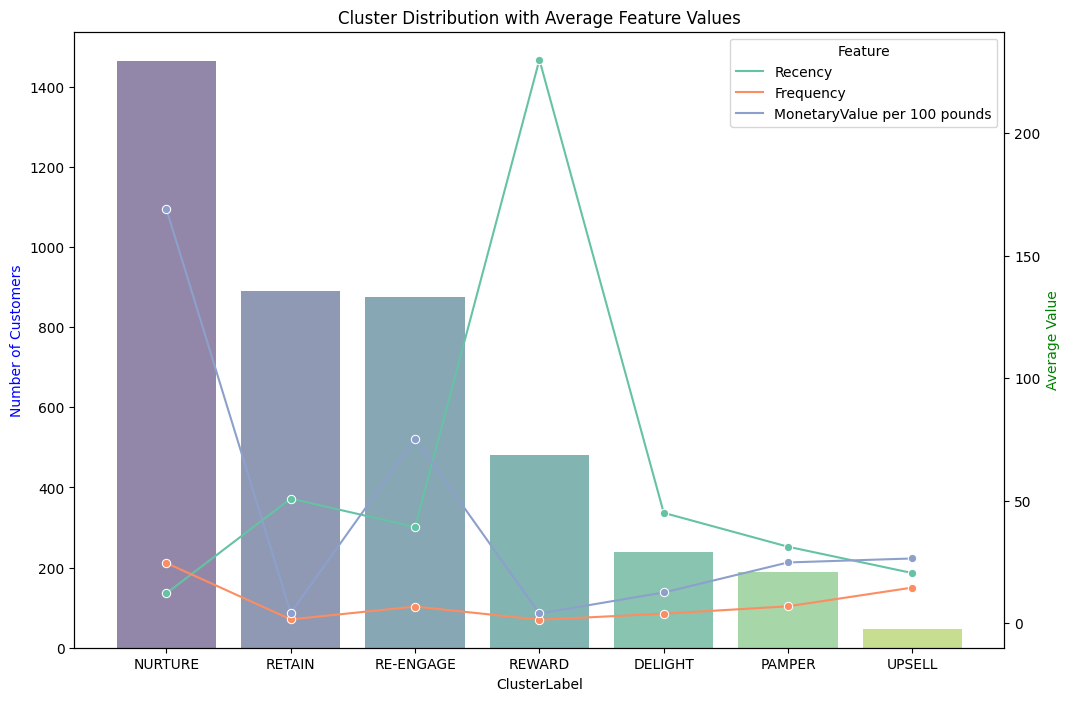

In [53]:
# Cluster counts
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

# Convert MonetaryValue
full_clustering_df['MonetaryValue per 100 pounds'] = full_clustering_df['Monetary'] / 100.0

# Group by cluster and get means
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean().reset_index()

# Melt for tidy format
feature_means_melted = feature_means.melt(id_vars='ClusterLabel', var_name='Feature', value_name='AverageValue')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Barplot: cluster sizes
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Lineplot: average feature values
ax2 = ax1.twinx()
sns.lineplot(data=feature_means_melted, x='ClusterLabel', y='AverageValue', hue='Feature', marker='o', ax=ax2, palette='Set2')
ax2.set_ylabel('Average Value', color='g')

plt.show()

From now, I will move on to the next section, **Sales Prediction**.
In this section, I will utilize supervised learning to predict future sales based on past purchasing behavior, customer segments, and other relevant features.

In [54]:
full_df = pd.merge(full_clustering_df, df, on = 'CustomerID', how = 'inner')
full_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel,MonetaryValue per 100 pounds,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
0,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.6,2010-12,Thursday,19
1,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,Finland,39.6,2010-12,Thursday,19
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,Finland,13.2,2010-12,Thursday,19
3,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,Finland,50.4,2010-12,Thursday,19
4,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,Finland,13.2,2010-12,Thursday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394562,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,23208,LUNCH BAG VINTAGE LEAF DESIGN,10,2011-11-28 09:48:00,1.65,United Kingdom,16.5,2011-11,Monday,9
394563,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,79321,CHILLI LIGHTS,24,2011-11-28 09:48:00,4.95,United Kingdom,118.8,2011-11,Monday,9
394564,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,20727,LUNCH BAG BLACK SKULL.,20,2011-11-28 09:48:00,1.65,United Kingdom,33.0,2011-11,Monday,9
394565,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,20728,LUNCH BAG CARS BLUE,10,2011-11-28 09:48:00,1.65,United Kingdom,16.5,2011-11,Monday,9


In this project, I want to predict customer sales, not each order's price. Therefore, I will predict the future `Monetary` value, not `TotalPrice`. 

In that case, I will create the first 9 months RFM dataset, and create `future_monetary` label from the last 3 months. 

In [55]:
numeric_df = full_df.select_dtypes(include = ['number'])

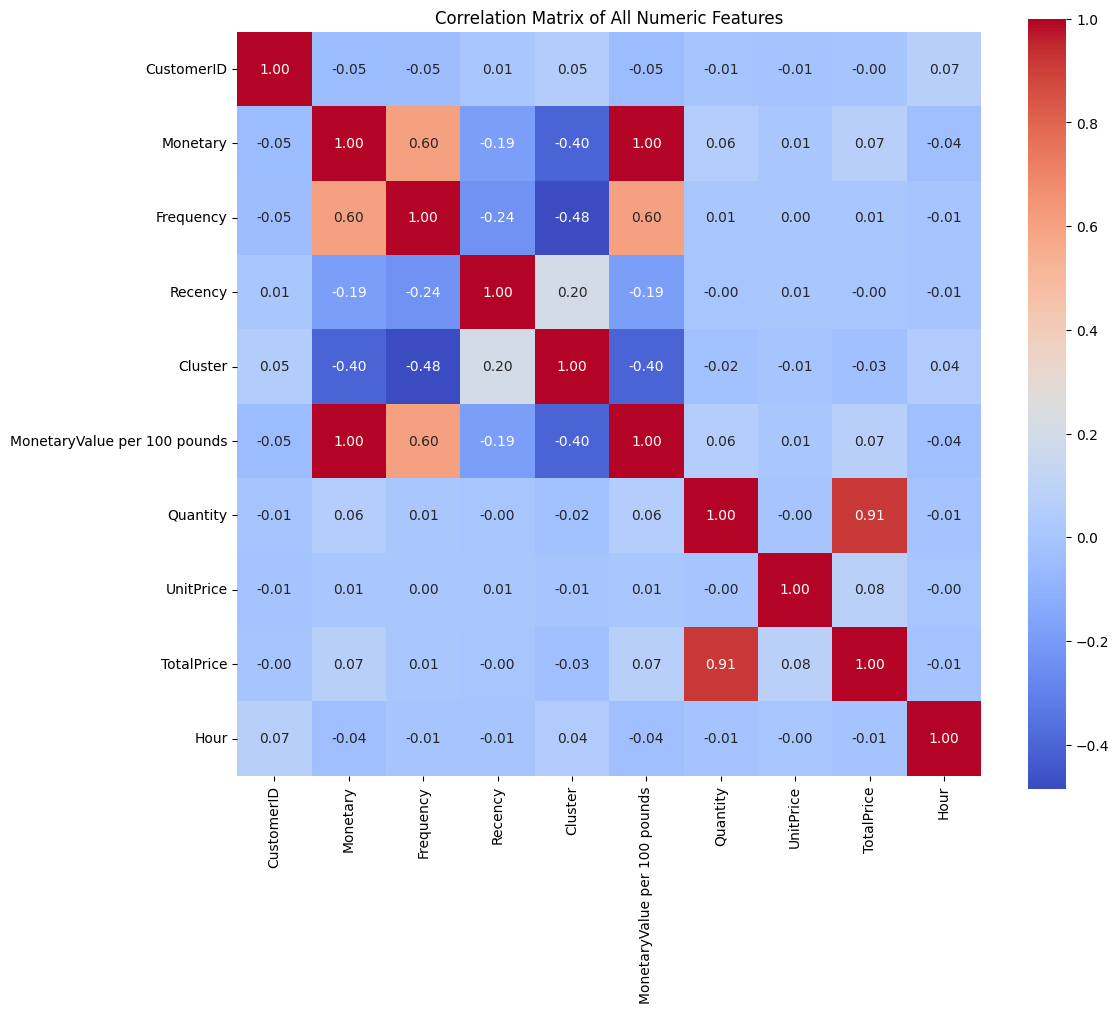

In [56]:
plt.figure(figsize = (12,10))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', square = True)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

In [57]:
split_date = pd.Timestamp('2011-11-01')

historical_df = full_df[full_df['InvoiceDate'] < split_date]
future_df = full_df[full_df['InvoiceDate'] >= split_date]

In [58]:
historical_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel,MonetaryValue per 100 pounds,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
0,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60,2010-12,Thursday,19
1,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,Finland,39.60,2010-12,Thursday,19
2,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,Finland,13.20,2010-12,Thursday,19
3,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,Finland,50.40,2010-12,Thursday,19
4,12348.0,1797.24,4,2011-09-25 13:13:00,74,3,RETAIN,17.9724,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,Finland,13.20,2010-12,Thursday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394536,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,570825,22193,RED DINER WALL CLOCK,4,2011-10-12 12:59:00,8.50,United Kingdom,34.00,2011-10,Wednesday,12
394537,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,570825,23168,CLASSIC CAFE SUGAR DISPENSER,36,2011-10-12 12:59:00,1.04,United Kingdom,37.44,2011-10,Wednesday,12
394538,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,570825,23117,POPPY FIELDS CHOPPING BOARD,6,2011-10-12 12:59:00,4.95,United Kingdom,29.70,2011-10,Wednesday,12
394539,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,570825,23114,VINTAGE LEAF CHOPPING BOARD,6,2011-10-12 12:59:00,4.95,United Kingdom,29.70,2011-10,Wednesday,12


In [59]:
future_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel,MonetaryValue per 100 pounds,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
31,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN,17.5755,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00,2011-11,Monday,9
32,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN,17.5755,577609,23460,SWEETHEART WALL TIDY,2,2011-11-21 09:51:00,9.95,Italy,19.90,2011-11,Monday,9
33,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN,17.5755,577609,21564,PINK HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,Italy,17.70,2011-11,Monday,9
34,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN,17.5755,577609,21411,GINGHAM HEART DOORSTOP RED,3,2011-11-21 09:51:00,4.25,Italy,12.75,2011-11,Monday,9
35,12349.0,1757.55,1,2011-11-21 09:51:00,18,3,RETAIN,17.5755,577609,21563,RED HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,Italy,17.70,2011-11,Monday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394562,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,23208,LUNCH BAG VINTAGE LEAF DESIGN,10,2011-11-28 09:48:00,1.65,United Kingdom,16.50,2011-11,Monday,9
394563,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,79321,CHILLI LIGHTS,24,2011-11-28 09:48:00,4.95,United Kingdom,118.80,2011-11,Monday,9
394564,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,20727,LUNCH BAG BLACK SKULL.,20,2011-11-28 09:48:00,1.65,United Kingdom,33.00,2011-11,Monday,9
394565,18229.0,7276.90,20,2011-11-28 09:48:00,11,-3,DELIGHT,72.7690,579013,20728,LUNCH BAG CARS BLUE,10,2011-11-28 09:48:00,1.65,United Kingdom,16.50,2011-11,Monday,9


In [60]:
agg_historical_df = historical_df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'InvoiceDate': ['min', 'max'],
    'Quantity': 'sum', 
    'UnitPrice': 'mean',})

agg_historical_df.columns = ['Monetary', 'Frequency', 'FirstPurchaseDate', 
                             'LastPurchaseDate', 'TotalQuantity', 'AbgUnitPrice']

agg_historical_df = agg_historical_df.reset_index()

snapshot_date = historical_df['InvoiceDate'].max() + pd.Timedelta(days = 1)

agg_historical_df['Recency'] = (snapshot_date - agg_historical_df['LastPurchaseDate']).dt.days
agg_historical_df['CustomerTenure'] = (agg_historical_df['LastPurchaseDate'] - agg_historical_df['FirstPurchaseDate']).dt.days
agg_historical_df['AvgOrderValue'] = agg_historical_df['Monetary'] / agg_historical_df['Frequency']
agg_historical_df['AvgItemsPerOrder']  = agg_historical_df['TotalQuantity'] / agg_historical_df['Frequency']

In [61]:
future_target = future_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
future_target.columns = ['CustomerID', 'FutureMonetary']

In [62]:
model_df = pd.merge(agg_historical_df, future_target, on = 'CustomerID', how = 'inner')
model_df.head(10)

,CustomerID,Monetary,Frequency,FirstPurchaseDate,LastPurchaseDate,TotalQuantity,AbgUnitPrice,Recency,CustomerTenure,AvgOrderValue,AvgItemsPerOrder,FutureMonetary
0,12347.0,4085.18,6,2010-12-07 14:57:00,2011-10-31 12:25:00,2266,2.734912,1,327,680.863333,377.666667,224.82
1,12352.0,2194.31,7,2011-02-16 12:33:00,2011-09-28 14:58:00,409,18.108286,34,224,313.472857,58.428571,311.73
2,12356.0,2753.08,2,2011-01-18 09:50:00,2011-04-08 12:33:00,1586,2.897719,207,80,1376.540000,793.000000,58.35
3,12358.0,484.86,1,2011-07-12 10:04:00,2011-07-12 10:04:00,100,7.719167,112,0,484.860000,100.000000,683.20
4,12362.0,4219.25,8,2011-02-17 10:30:00,2011-10-28 10:10:00,1798,4.062727,4,252,527.406250,224.750000,1006.98
5,12364.0,1002.78,3,2011-08-19 15:24:00,2011-10-30 15:43:00,1004,2.208793,2,72,334.260000,334.666667,310.32
6,12375.0,230.30,1,2011-09-02 14:23:00,2011-09-02 14:23:00,87,6.101818,60,0,230.300000,87.000000,227.20
7,12380.0,1684.42,3,2011-06-07 09:49:00,2011-10-14 11:39:00,812,3.030345,18,129,561.473333,270.666667,1040.39
8,12381.0,1279.24,3,2011-08-12 09:57:00,2011-10-12 11:30:00,570,3.997187,20,61,426.413333,190.000000,566.07
9,12384.0,292.69,1,2011-08-10 11:23:00,2011-08-10 11:23:00,62,7.795000,83,0,292.690000,62.000000,292.58


In [63]:
X = model_df.drop('FutureMonetary', axis = 1)
y = model_df['FutureMonetary']

In [64]:
X = X.drop(columns = ['FirstPurchaseDate', 'LastPurchaseDate'])

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Prediction

LRpredictions = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LRmae = mean_absolute_error(y_test, LRpredictions)
LRrmse = mean_squared_error(y_test, LRpredictions, squared = False)
LRr2 = r2_score(y_test, LRpredictions)

In [69]:
def performace_eval(name, mae, rmse, r2):
    print(f'{name}', 'Performace', 
          ': Mean Absolute Error = ', round(mae, 3),
          ', Mean Squared Error = ', round(rmse, 3),
          ', R-squared Score = ', round(r2, 3))

In [70]:
performace_eval("Linear Regression", LRmae, LRrmse, LRr2)

Linear Regression Performace : Mean Absolute Error =  1107.907 , Mean Squared Error =  9685.419 , R-squared Score =  0.015


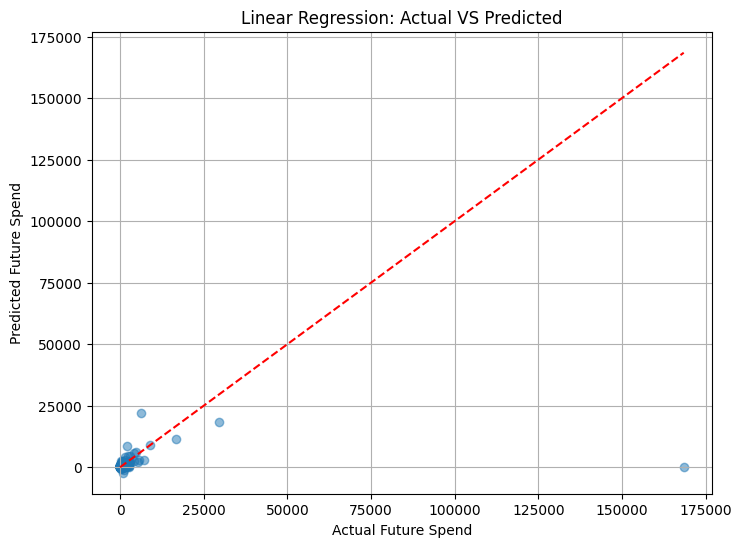

In [71]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, LRpredictions, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Future Spend')
plt.ylabel('Predicted Future Spend')
plt.title('Linear Regression: Actual VS Predicted')
plt.grid(True)
plt.show()

As you can see, there is one abnormal point which seems impossible to guess and decreases the accuracy of this model dramatically. 
Therefore, I want to see what will happen after I remove the data.

In [72]:
filtered_df = model_df[model_df['FutureMonetary'] < 100000]

In [73]:
X = filtered_df.drop(columns = ['FirstPurchaseDate', 'LastPurchaseDate', 'FutureMonetary'])
y = filtered_df['FutureMonetary']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Prediction

LR_new_predictions = model.predict(X_test)

LR_new_predictions = np.maximum(LR_new_predictions, 0)

In [77]:
LR_new_mae = mean_absolute_error(y_test, LR_new_predictions)
LR_new_rmse = mean_squared_error(y_test, LR_new_predictions, squared = False)
LR_new_r2 = r2_score(y_test, LR_new_predictions)

In [78]:
performace_eval("Linear Regression Without 1 abnormal data", LR_new_mae, LR_new_rmse, LR_new_r2)

Linear Regression Without 1 abnormal data Performace : Mean Absolute Error =  531.802 , Mean Squared Error =  1288.818 , R-squared Score =  0.454


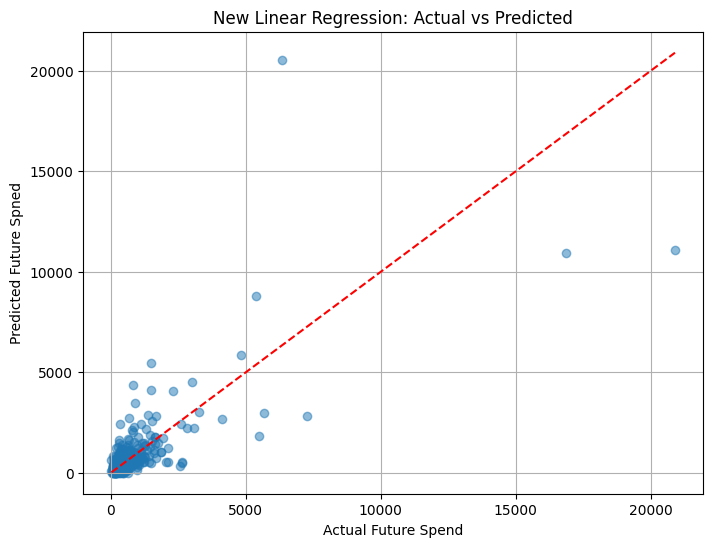

In [79]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, LR_new_predictions, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Future Spend')
plt.ylabel('Predicted Future Spned')
plt.title('New Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

From now on, I will make a random forest regression model to enhance the accuracy of prediction. 

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100,max_depth = 3, random_state = 42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [98]:
RF_predictions = rf_model.predict(X_test)


In [99]:
RF_mae = mean_absolute_error(y_test, RF_predictions)
RF_rmse = mean_squared_error(y_test, RF_predictions)
RF_r2 = r2_score(y_test, RF_predictions)

In [100]:
performace_eval('Random Forest Regressor', RF_mae, RF_rmse, RF_r2)

Random Forest Regressor Performace : Mean Absolute Error =  500.608 , Mean Squared Error =  1741828.387 , R-squared Score =  0.428


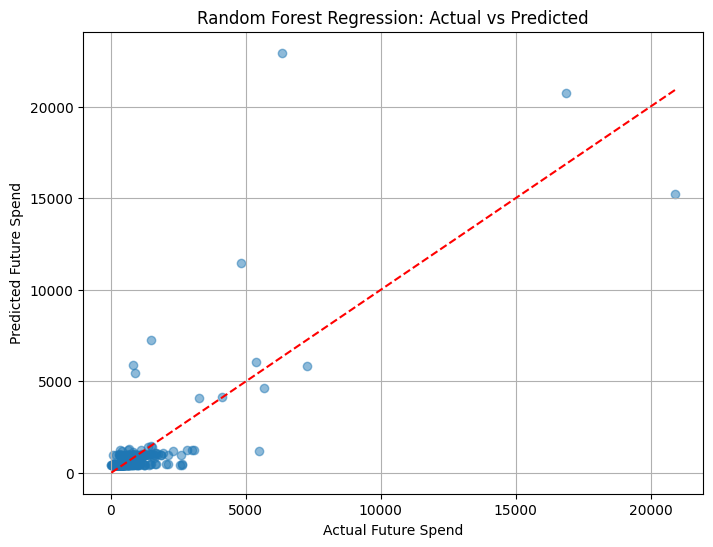

In [101]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, RF_predictions, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Future Spend')
plt.ylabel('Predicted Future Spend')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

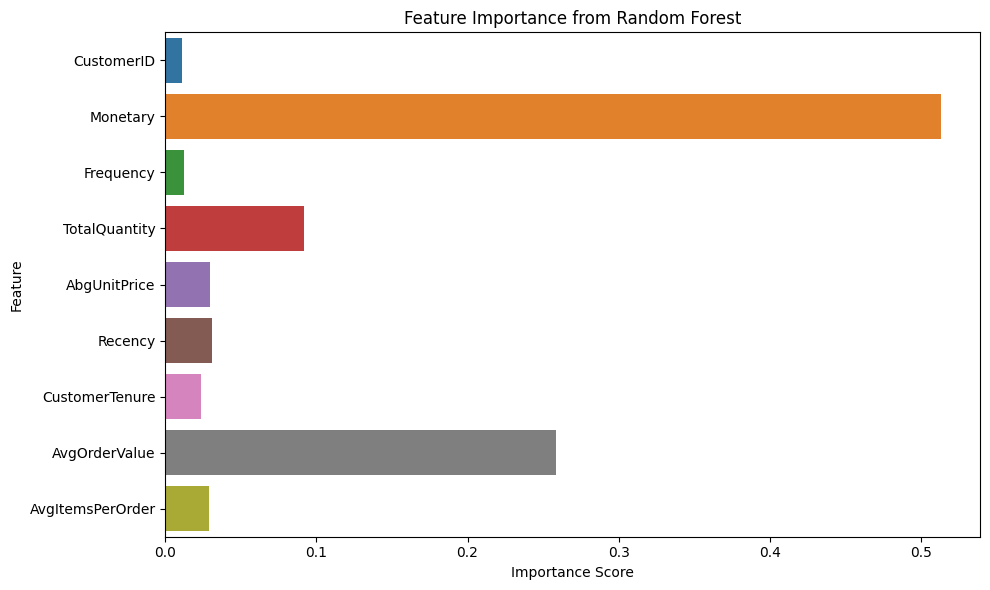

In [229]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

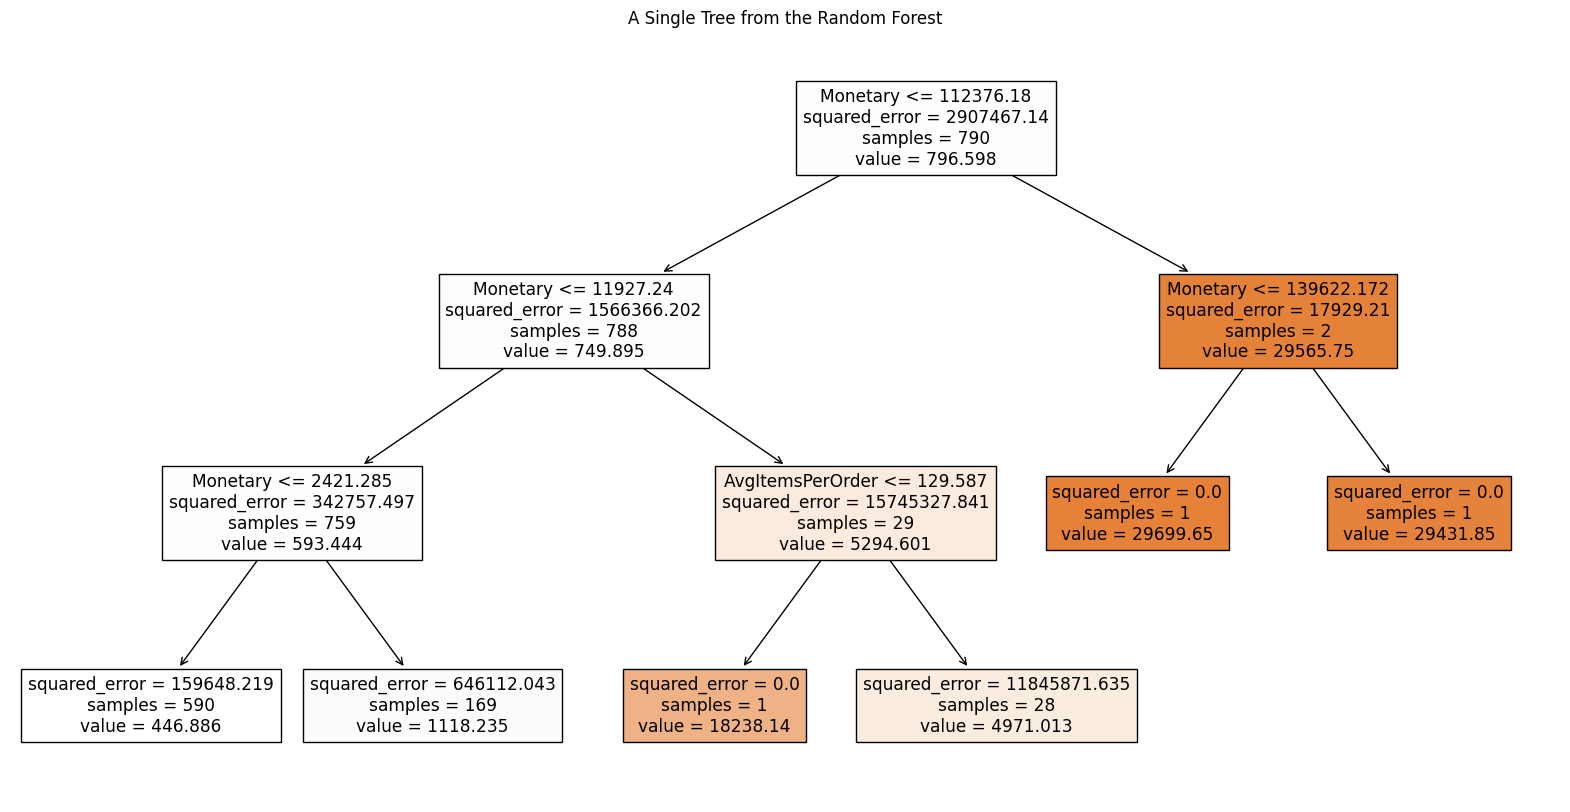

In [103]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names = X.columns.tolist(), filled=True, max_depth=3)
plt.title("A Single Tree from the Random Forest")
plt.show()

In [104]:
pip install tensorflow keras

/bin/bash: /opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [105]:
import tensorflow as tf
from tensorflow import keras

In [106]:
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler 

In [153]:
q_high = filtered_df['FutureMonetary'].quantile(0.99)
filtered_df = filtered_df[filtered_df['FutureMonetary'] <= q_high]

In [154]:
filtered_df['LogFutureMonetary'] = np.log1p(filtered_df['FutureMonetary'])

In [155]:
X = filtered_df.drop(columns = ['FirstPurchaseDate', 'LastPurchaseDate', 'FutureMonetary'])
y = filtered_df['LogFutureMonetary']

In [156]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [158]:
NN_model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
                                tf.keras.layers.Dropout(0,3),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(1)])

In [159]:
NN_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [161]:
history = NN_model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 32, verbose = 0)

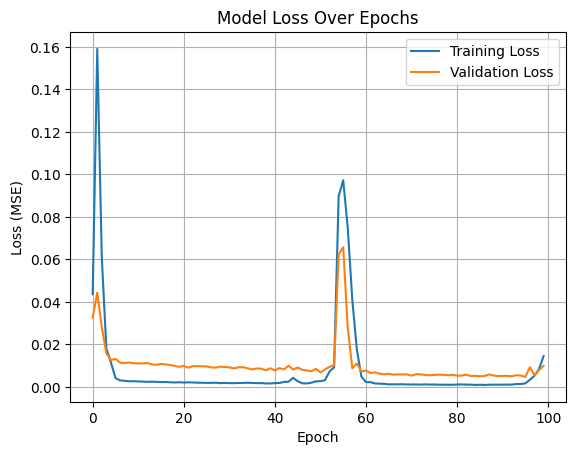

In [162]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [163]:
NN_pred_log = NN_model.predict(X_test).flatten()
NN_pred = np.expm1(NN_pred_log)
y_true = np.expm1(y_test)
NN_mae = mean_absolute_error(y_true, NN_pred)
NN_rmse = mean_squared_error(y_true, NN_pred, squared = False)
NN_r2 = r2_score(y_true, NN_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Neural Network Performace : Mean Absolute Error =  108.253 , Mean Squared Error =  931.684 , R-squared Score =  0.288


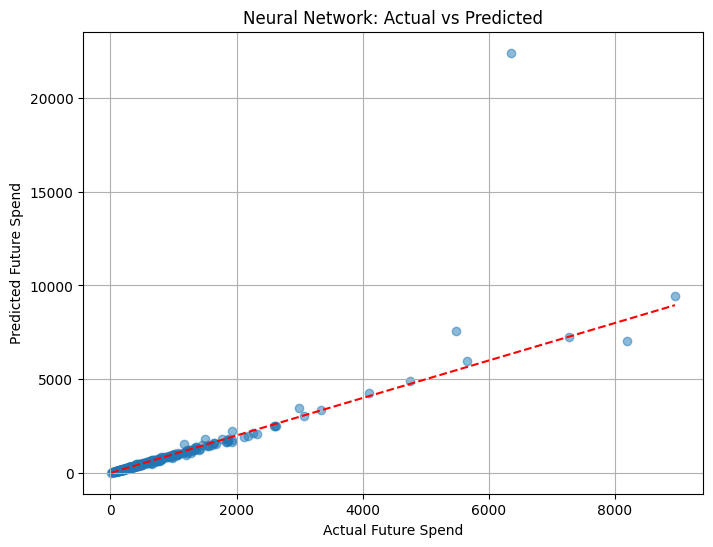

In [230]:
performace_eval('Neural Network', NN_mae, NN_rmse, NN_r2)

plt.figure(figsize = (8,6))
plt.scatter(y_true, NN_pred, alpha = 0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Actual Future Spend')
plt.ylabel('Predicted Future Spend')
plt.title('Neural Network: Actual vs Predicted')
plt.grid(True)
plt.show()

In [222]:
from sklearn.ensemble import GradientBoostingRegressor
X = filtered_df.drop(columns = ['FirstPurchaseDate', 'LastPurchaseDate', 'FutureMonetary', 'LogFutureMonetary'])
y = filtered_df['FutureMonetary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
GB_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.05, max_depth = 3, subsample=0.8, random_state = 42)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)

In [223]:
GB_mae = mean_absolute_error(y_test, y_pred)
GB_rmse = mean_squared_error(y_test, y_pred)
GB_r2 = r2_score(y_test, y_pred)

In [224]:
performace_eval('Gradient Boosting', GB_mae, GB_rmse, GB_r2)

Gradient Boosting Performace : Mean Absolute Error =  429.72 , Mean Squared Error =  832330.555 , R-squared Score =  0.317


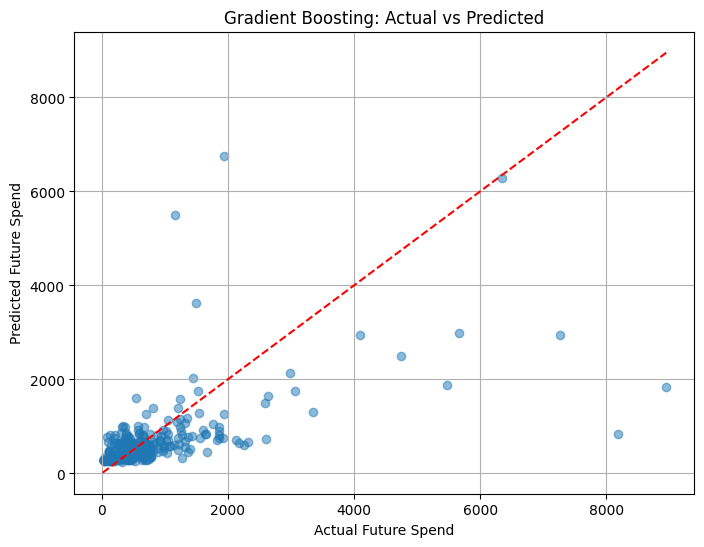

In [227]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Future Spend")
plt.ylabel("Predicted Future Spend")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.show()

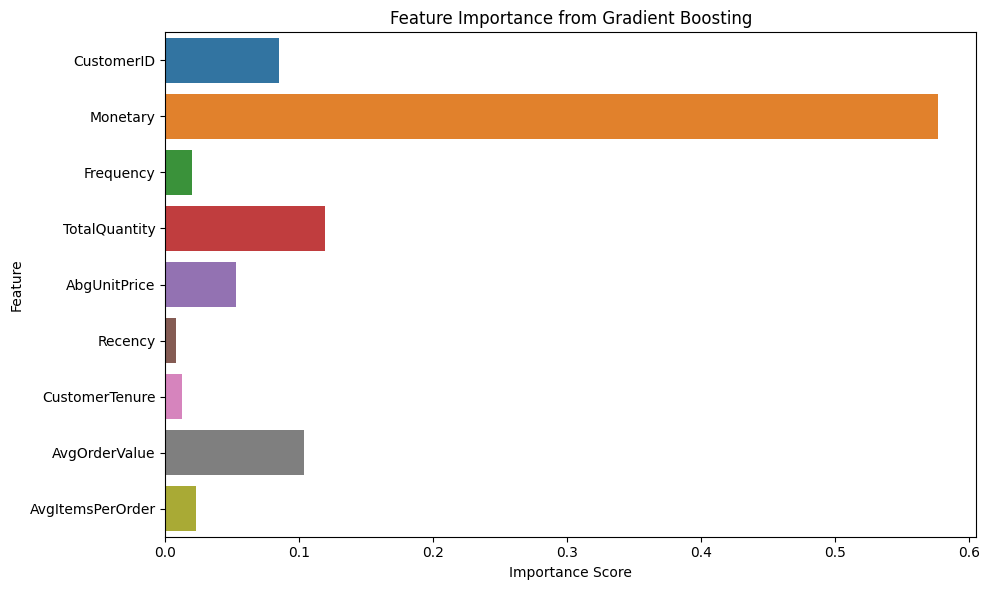

In [228]:
feature_importance = pd.Series(GB_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [231]:
performace_eval('Gradient Boosting', GB_mae, GB_rmse, GB_r2)
performace_eval('Neural Network', NN_mae, NN_rmse, NN_r2)
performace_eval('Random Forest Regressor', RF_mae, RF_rmse, RF_r2)
performace_eval("Linear Regression Without 1 abnormal data", LR_new_mae, LR_new_rmse, LR_new_r2)

Gradient Boosting Performace : Mean Absolute Error =  429.72 , Mean Squared Error =  832330.555 , R-squared Score =  0.317
Neural Network Performace : Mean Absolute Error =  108.253 , Mean Squared Error =  931.684 , R-squared Score =  0.288
Random Forest Regressor Performace : Mean Absolute Error =  500.608 , Mean Squared Error =  1741828.387 , R-squared Score =  0.428
Linear Regression Without 1 abnormal data Performace : Mean Absolute Error =  531.802 , Mean Squared Error =  1288.818 , R-squared Score =  0.454


After training multiple supervised learning models to predict future customer spending `FutureMonetary`, we evaluated performance using **MAE**, **MSE**, **R-squared Score**. Here's a summary of our findings.

- Neural Netwrok achieved the **lowest Mean Absolute Error** suggesting high accuracy on a per-customer level.
- Linear Regression explained the **highest variance** in the data while maintaining competitive MAE.
- Random Forest performed moderately well with decent R-squared score but higher error.
- Gradient Boosting showed unstable results on this dataset, with inconsistent performance across metrics. 

**Insights**

- Neural Networks may be more suitable for predicting precise customer-level spending.
- Linear models offer better interpretability and explainability for strategic business decisions.
- Removing outliers and feature engineering significantly improved prediction stability and accuracy. 

**Key Insights for Business**

- **High Monetary & Frequency** customers tend to spend more in the future - target them for **loyalty programs or VIP offers**
- **Low Recency** are also strong future buyers - use **follow-up promotions** to encourage repeat buying.
- **High AvgItemsPerOrder** customers are bulk buyers - offer **bundle discounts** or **upsell packages**.
- **Customer Tenure** positively correlates with future spend - show appreciation to **long-term customers** with tailored offers.

**Business Strategy**

1. **Personalized Email Campaigns**
   - Target: High Monetary + Recent Purchasers
   - Action: Recommend new/related products

2. **Bundle Discounts**
   - Target: Bulk Buyers (high Average Item per Order)
   - Action: Promote volume deals or subscriptions
  
3. **Loyalty & Anniversary Rewards**
   - Target: Long-Tenure Customers
   - Action: Send exclusive discounts or gifts

4. **Win-back Campaign**
   - Target: Low Recency + High Past Spend
   - Action: Limited-time offers to reactivate churned

**Conclusion**


This project demonstrates how data science techniques such as clustering and regression can help retail businesses understand their customers and predict future revenue. The integration of machine learning models and customer behavior analysis can drive targeted marketing strategies, optimize inventory planning, and enhance customer retention. 